<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_4'

In [4]:
os.listdir(base_path)

['data_multi_delta_4_n20.csv',
 'data_multi_delta_4_n30.csv',
 'data_multi_delta_4_n60.csv',
 'data_multi_delta_4_n120.csv',
 'data_multi_delta_4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,78.714134,75.399270,67.008882,45.127378,1246.899226,1523.148890,2095.293450,-572.144560
1,0.0,1.0,51.988740,75.481271,59.243232,30.245928,-3179.745976,-2952.786805,2957.137251,-5909.924056
2,0.0,2.0,96.420656,29.646826,65.144482,24.492459,1065.234503,1290.938925,1273.918838,17.020088
3,0.0,3.0,29.374054,67.286895,87.593798,61.102496,-797.303880,-541.946637,42.987613,-584.934250
4,0.0,4.0,25.844716,43.024493,35.654640,70.401593,-2779.726754,-2594.801312,647.013135,-3241.814447
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,52.709921,69.908688,37.772051,42.526068,-2179.410220,-1966.493492,-564.400258,-1402.093234
19996,999.0,16.0,61.769503,29.989434,75.478156,41.400491,448.847372,667.484956,1925.949182,-1258.464226
19997,999.0,17.0,28.980683,37.990728,96.828519,31.794070,571.314510,776.908510,-524.331726,1301.240236
19998,999.0,18.0,42.635111,56.438489,69.031885,31.324075,2386.320826,2595.750386,-354.433002,2950.183388


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,78.714134,75.399270,67.008882,45.127378,1246.899226,1523.148890,2095.293450,-572.144560
1,0.0,1.0,51.988740,75.481271,59.243232,30.245928,-3179.745976,-2952.786805,2957.137251,-5909.924056
2,0.0,2.0,96.420656,29.646826,65.144482,24.492459,1065.234503,1290.938925,1273.918838,17.020088
3,0.0,3.0,29.374054,67.286895,87.593798,61.102496,-797.303880,-541.946637,42.987613,-584.934250
4,0.0,4.0,25.844716,43.024493,35.654640,70.401593,-2779.726754,-2594.801312,647.013135,-3241.814447
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,52.709921,69.908688,37.772051,42.526068,-2179.410220,-1966.493492,-564.400258,-1402.093234
19996,999.0,16.0,61.769503,29.989434,75.478156,41.400491,448.847372,667.484956,1925.949182,-1258.464226
19997,999.0,17.0,28.980683,37.990728,96.828519,31.794070,571.314510,776.908510,-524.331726,1301.240236
19998,999.0,18.0,42.635111,56.438489,69.031885,31.324075,2386.320826,2595.750386,-354.433002,2950.183388


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    78.714134  75.399270  67.008882  45.127378  1246.899226   
      1.0    51.988740  75.481271  59.243232  30.245928 -3179.745976   
      2.0    96.420656  29.646826  65.144482  24.492459  1065.234503   
      3.0    29.374054  67.286895  87.593798  61.102496  -797.303880   
      4.0    25.844716  43.024493  35.654640  70.401593 -2779.726754   
...                ...        ...        ...        ...          ...   
999.0 15.0   52.709921  69.908688  37.772051  42.526068 -2179.410220   
      16.0   61.769503  29.989434  75.478156  41.400491   448.847372   
      17.0   28.980683  37.990728  96.828519  31.794070   571.314510   
      18.0   42.635111  56.438489  69.031885  31.324075  2386.320826   
      19.0   51.957081  94.242678  52.646660  22.439064 -8392.204018   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0    1523.148890  2095.293450  -572.144560  
      1.0   -2952.786805  2957.137251 -5909.924056  
      2.0    1290.938925  1273.918838    17.020088  
      3.0    -541.946637    42.987613  -584.934250  
      4.0   -2594.801312   647.013135 -3241.814447  
...                  ...          ...          ...  
999.0 15.0  -1966.493492  -564.400258 -1402.093234  
      16.0    667.484956  1925.949182 -1258.464226  
      17.0    776.908510  -524.331726  1301.240236  
      18.0   2595.750386  -354.433002  2950.183388  
      19.0  -8160.918536 -1236.271358 -6924.647178  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    78.714134  75.399270  67.008882  45.127378  1246.899226   
      1.0    51.988740  75.481271  59.243232  30.245928 -3179.745976   
      2.0    96.420656  29.646826  65.144482  24.492459  1065.234503   
      3.0    29.374054  67.286895  87.593798  61.102496  -797.303880   
      4.0    25.844716  43.024493  35.654640  70.401593 -2779.726754   
...                ...        ...        ...        ...          ...   
999.0 15.0   52.709921  69.908688  37.772051  42.526068 -2179.410220   
      16.0   61.769503  29.989434  75.478156  41.400491   448.847372   
      17.0   28.980683  37.990728  96.828519  31.794070   571.314510   
      18.0   42.635111  56.438489  69.031885  31.324075  2386.320826   
      19.0   51.957081  94.242678  52.646660  22.439064 -8392.204018   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0    1523.148890  2095.293450  -572.144560  
      1.0   -2952.786805  2957.137251 -5909.924056  
      2.0    1290.938925  1273.918838    17.020088  
      3.0    -541.946637    42.987613  -584.934250  
      4.0   -2594.801312   647.013135 -3241.814447  
...                  ...          ...          ...  
999.0 15.0  -1966.493492  -564.400258 -1402.093234  
      16.0    667.484956  1925.949182 -1258.464226  
      17.0    776.908510  -524.331726  1301.240236  
      18.0   2595.750386  -354.433002  2950.183388  
      19.0  -8160.918536 -1236.271358 -6924.647178  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,78.714134,75.399270,67.008882,45.127378,1246.899226,1523.148890,2095.293450,-572.144560
1,0.0,1.0,51.988740,75.481271,59.243232,30.245928,-3179.745976,-2952.786805,2957.137251,-5909.924056
2,0.0,2.0,96.420656,29.646826,65.144482,24.492459,1065.234503,1290.938925,1273.918838,17.020088
3,0.0,3.0,29.374054,67.286895,87.593798,61.102496,-797.303880,-541.946637,42.987613,-584.934250
4,0.0,4.0,25.844716,43.024493,35.654640,70.401593,-2779.726754,-2594.801312,647.013135,-3241.814447
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,52.709921,69.908688,37.772051,42.526068,-2179.410220,-1966.493492,-564.400258,-1402.093234
19996,999.0,16.0,61.769503,29.989434,75.478156,41.400491,448.847372,667.484956,1925.949182,-1258.464226
19997,999.0,17.0,28.980683,37.990728,96.828519,31.794070,571.314510,776.908510,-524.331726,1301.240236
19998,999.0,18.0,42.635111,56.438489,69.031885,31.324075,2386.320826,2595.750386,-354.433002,2950.183388


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    78.714134  75.399270  67.008882  45.127378  1246.899226   
      1.0    51.988740  75.481271  59.243232  30.245928 -3179.745976   
      2.0    96.420656  29.646826  65.144482  24.492459  1065.234503   
      3.0    29.374054  67.286895  87.593798  61.102496  -797.303880   
      4.0    25.844716  43.024493  35.654640  70.401593 -2779.726754   
...                ...        ...        ...        ...          ...   
999.0 15.0   52.709921  69.908688  37.772051  42.526068 -2179.410220   
      16.0   61.769503  29.989434  75.478156  41.400491   448.847372   
      17.0   28.980683  37.990728  96.828519  31.794070   571.314510   
      18.0   42.635111  56.438489  69.031885  31.324075  2386.320826   
      19.0   51.957081  94.242678  52.646660  22.439064 -8392.204018   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0    1523.148890  2095.293450  -572.144560  
      1.0   -2952.786805  2957.137251 -5909.924056  
      2.0    1290.938925  1273.918838    17.020088  
      3.0    -541.946637    42.987613  -584.934250  
      4.0   -2594.801312   647.013135 -3241.814447  
...                  ...          ...          ...  
999.0 15.0  -1966.493492  -564.400258 -1402.093234  
      16.0    667.484956  1925.949182 -1258.464226  
      17.0    776.908510  -524.331726  1301.240236  
      18.0   2595.750386  -354.433002  2950.183388  
      19.0  -8160.918536 -1236.271358 -6924.647178  

[20000 rows x 8 columns]

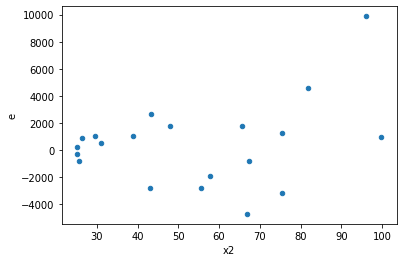

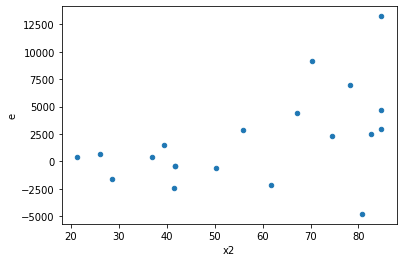

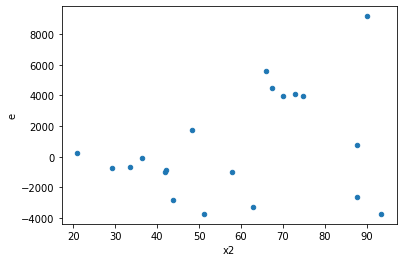

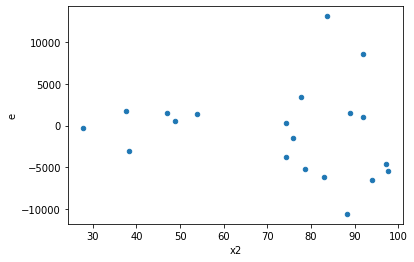

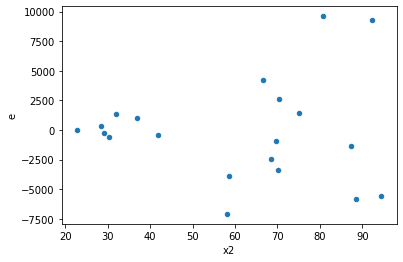

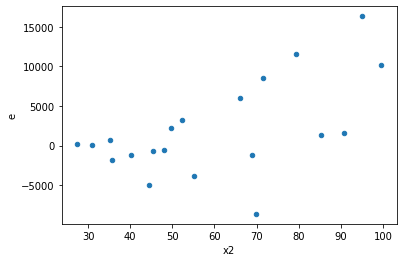

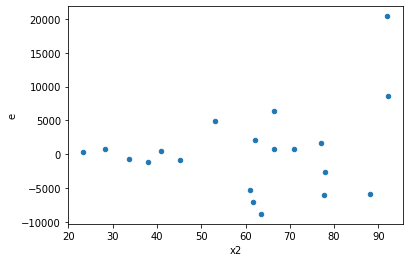

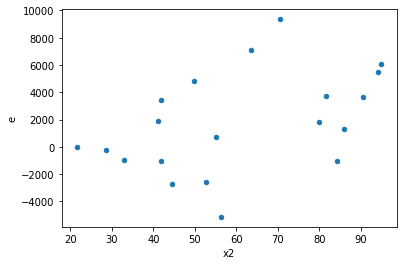

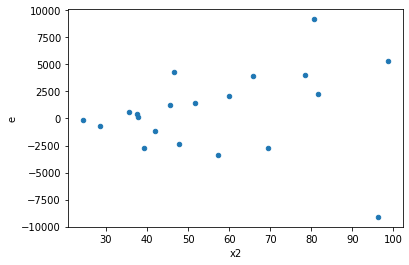

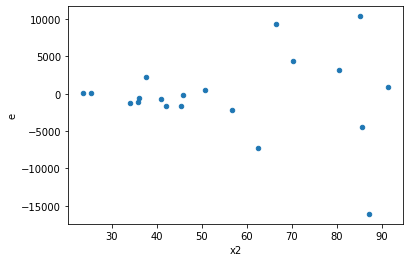

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,4.0,4.0,19058991.75310762,71795485.39259705,4764747.938276905,17948871.348149262,3.767013823325182,0.22710811068935555,0.8864459446553222,0.11355405534467777,Reject001=1 : Homoscedasticity
1.0,4.0,4.0,6386432.921220902,18495420.16458071,1596608.2303052256,4623855.041145178,2.8960486069029154,0.32764048729765416,0.8361797563511729,0.16382024364882708,Reject001=1 : Homoscedasticity
2.0,4.0,4.0,18524296.17963491,60632765.05876067,4631074.0449087275,15158191.264690168,3.2731481115821626,0.2773263361130507,0.8613368319434747,0.13866316805652534,Reject001=1 : Homoscedasticity
4.0,4.0,4.0,24029720.341822464,60370502.075447194,6007430.085455616,15092625.518861799,2.5123264531038054,0.3940484315916182,0.8029757842041909,0.1970242157958091,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,17154173.336855654,48763295.293558486,4288543.334213913,12190823.823389621,2.8426490939549267,0.33584366458371084,0.8320781677081446,0.16792183229185542,Reject001=1 : Homoscedasticity
7.0,4.0,4.0,18017919.610473055,34453604.369002424,4504479.902618264,8613401.092250606,1.91218548610773,0.5455202171669447,0.7272398914165277,0.2727601085834723,Reject001=1 : Homoscedasticity
8.0,4.0,4.0,3620432.7367883795,17711493.878085397,905108.1841970949,4427873.469521349,4.892093063382513,0.15327248264254822,0.9233637586787259,0.07663624132127411,Reject001=1 : Homoscedasticity
15.0,4.0,4.0,12466291.647819346,90045210.85855837,3116572.9119548365,22511302.714639593,7.223095159522394,0.0815383425497378,0.9592308287251311,0.0407691712748689,Reject001=1 : Homoscedasticity
16.0,4.0,4.0,21832377.813894596,66242048.653982125,5458094.453473649,16560512.163495531,3.0341197472235137,0.30775594227714675,0.8461220288614266,0.15387797113857338,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,19058991.75310762,71795485.39259705,4764747.938276905,17948871.348149262,3.767013823325182,0.22710811068935555,Reject001=1 : Homoscedasticity
1.0,4.0,4.0,6386432.921220902,18495420.16458071,1596608.2303052256,4623855.041145178,2.8960486069029154,0.32764048729765416,Reject001=1 : Homoscedasticity
2.0,4.0,4.0,18524296.17963491,60632765.05876067,4631074.0449087275,15158191.264690168,3.2731481115821626,0.2773263361130507,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,62082171.78773539,50414686.451998286,15520542.946933847,12603671.612999571,0.8120638341128061,0.84498698697071,Reject001=1 : Homoscedasticity
4.0,4.0,4.0,24029720.341822464,60370502.075447194,6007430.085455616,15092625.518861799,2.5123264531038054,0.3940484315916182,Reject001=1 : Homoscedasticity
5.0,4.0,4.0,5680037.103355964,5384233.338412466,1420009.275838991,1346058.3346031166,0.947922212555843,0.9599069875403398,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,17154173.336855654,48763295.293558486,4288543.334213913,12190823.823389621,2.8426490939549267,0.33584366458371084,Reject001=1 : Homoscedasticity
7.0,4.0,4.0,18017919.610473055,34453604.369002424,4504479.902618264,8613401.092250606,1.91218548610773,0.5455202171669447,Reject001=1 : Homoscedasticity
8.0,4.0,4.0,3620432.7367883795,17711493.878085397,905108.1841970949,4427873.469521349,4.892093063382513,0.15327248264254822,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      852
Reject001=0 : Heteroscedasticity    148
Name: Result_test, dtype: int64